In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

clear_output()

In [25]:
df = pd.read_pickle('data/saeb_treated.pkl')
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,amostra,proficiencia,erro_padrao,proficiencia_saeb,...,escolaridade_pai_5,escolaridade_pai_6,forma_chegada_escola_0,forma_chegada_escola_1,forma_chegada_escola_2,forma_chegada_escola_3,forma_chegada_escola_4,forma_chegada_escola_5,forma_chegada_escola_6,forma_chegada_escola_7
69,2021,PB,1,43575034,1,MT,0,-0.220310,0.350673,237.650742,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
70,2021,PB,1,43575034,1,LP,0,-1.053385,0.447439,191.950468,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71,2021,PB,1,49370848,1,LP,0,-0.785038,0.389307,206.734607,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126,2021,PB,1,43517493,1,MT,0,-0.357253,0.377772,229.996679,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,2021,PB,1,43509591,1,MT,0,1.000746,0.363297,305.898405,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# save unique columns to file
with open('data/unique_columns.txt', 'w') as f:
    for item in df.columns:
        f.write("%s\n" % item)

In [27]:
print(df.shape)

(155841, 52)


In [28]:
df = df[df['disciplina'] == 'MT']

In [31]:
columns_oi = ['possui_eletrecidade', 'possui_escrivaninha', 'responsaveis_leem', 'responsaveis_incentivam_realizacao_licao_casa', 'responsaveis_incentivam_estudos', 'responsaveis_incentivam_comparecer_aulas', 'tempo_chegada_escola', 'transporte_escolar']
columns_oi += [f'escolaridade_mae_{i}' for i in range(1, 6)]
columns_oi += [f'escolaridade_pai_{i}' for i in range(1, 7)]
columns_oi += [f'forma_chegada_escola_{i}' for i in range(1, 8)]


# filter columns_oi to exclude ones with dtype different than object
#columns_oi = [col for col in columns_oi if df[col].dtype == 'object']

In [32]:
for column in columns_oi:
    print(column, df[column].unique())

possui_eletrecidade [1. 0.]
possui_escrivaninha [0. 1.]
responsaveis_leem [ 0.  1.  2. nan]
responsaveis_incentivam_realizacao_licao_casa [2. 1. 0.]
responsaveis_incentivam_estudos [2. 1. 0.]
responsaveis_incentivam_comparecer_aulas [2. 0. 1.]
tempo_chegada_escola [0. 1. 2.]
transporte_escolar [ 0.  1. nan]
escolaridade_mae_1 [ 0.  1. nan]
escolaridade_mae_2 [ 0.  1. nan]
escolaridade_mae_3 [ 0.  1. nan]
escolaridade_mae_4 [ 0.  1. nan]
escolaridade_mae_5 [ 0.  1. nan]
escolaridade_pai_1 [ 0.  1. nan]
escolaridade_pai_2 [ 0.  1. nan]
escolaridade_pai_3 [ 0.  1. nan]
escolaridade_pai_4 [ 0.  1. nan]
escolaridade_pai_5 [ 0.  1. nan]
escolaridade_pai_6 [ 0.  1. nan]
forma_chegada_escola_1 [ 0.  1. nan]
forma_chegada_escola_2 [ 0.  1. nan]
forma_chegada_escola_3 [ 1.  0. nan]
forma_chegada_escola_4 [ 0.  1. nan]
forma_chegada_escola_5 [ 0.  1. nan]
forma_chegada_escola_6 [ 0.  1. nan]
forma_chegada_escola_7 [ 0.  1. nan]


In [33]:
X = df[columns_oi]
y = df['desempenho_aluno_cat']

In [39]:
print(X.shape, y.shape)

(55557, 26) (55557,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))

# desempenho_aluno_cat has 4 classes
model.add(Dense(4, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.summary()

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/erlo/miniconda3/envs/aprendizagem/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 12)             │           324 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600 (2.34 KB)

 Trainable params: 600 (2.34 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5500 - loss: 1.2711 - val_accuracy: 0.5624 - val_loss: 1.0147
Epoch 2/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.5576 - loss: 1.0121 - val_accuracy: 0.5624 - val_loss: 0.9950
Epoch 3/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.5608 - loss: 1.0006 - val_accuracy: 0.5624 - val_loss: 0.9932
Epoch 4/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.5641 - loss: 0.9966 - val_accuracy: 0.5624 - val_loss: 0.9929
Epoch 5/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.5602 - loss: 1.0013 - val_accuracy: 0.5624 - val_loss: 0.9931
Epoch 6/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.5607 - loss: 1.0001 - val_accuracy: 0.5624 - val_loss: 0.9932
Epoch 7/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.5627 - loss: 0.9939 - val_accuracy: 0.5624 - val_loss: 0.9933
Epoch 8/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5622 - loss: 0.9

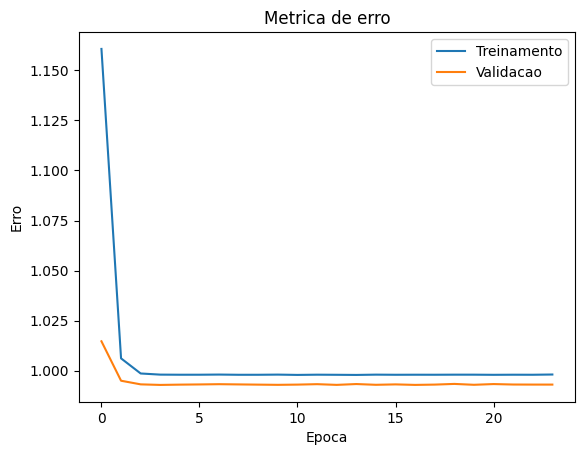

1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step

--> Acuracia (treino): 0.5613
--> Acuracia (validacao): 0.5624


In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Convert the predictions to class indices
pred_train = np.argmax(model.predict(X_train), axis=1)
pred_val = np.argmax(model.predict(X_val), axis=1)

# Ensure that the true labels are in the correct format (which is already integer-encoded)
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Calculate accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')

In [52]:
# another strategy: splitting the target from range(0, 4) to 0, 1
# by 0, 1: 0 and 1, 2: 1

y_train = y_train.apply(lambda x: 0 if x == 0 else 1)
y_val = y_val.apply(lambda x: 0 if x == 0 else 1)

model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6917 - loss: 0.6699 - val_accuracy: 0.6911 - val_loss: 0.6247
Epoch 2/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.6944 - loss: 0.6191 - val_accuracy: 0.6911 - val_loss: 0.6182
Epoch 3/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.6965 - loss: 0.6139 - val_accuracy: 0.6911 - val_loss: 0.6183
Epoch 4/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6928 - loss: 0.6169 - val_accuracy: 0.6911 - val_loss: 0.6183
Epoch 5/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7000 - loss: 0.6109 - val_accuracy: 0.6911 - val_loss: 0.6182
Epoch 6/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6946 - loss: 0.6154 - val_accuracy: 0.6911 - val_loss: 0.6182
Epoch 7/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.6938 - loss: 0.6160 - val_accuracy: 0.6911 - val_loss: 0.6184
Epoch 8/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - loss: 0.6185 - 

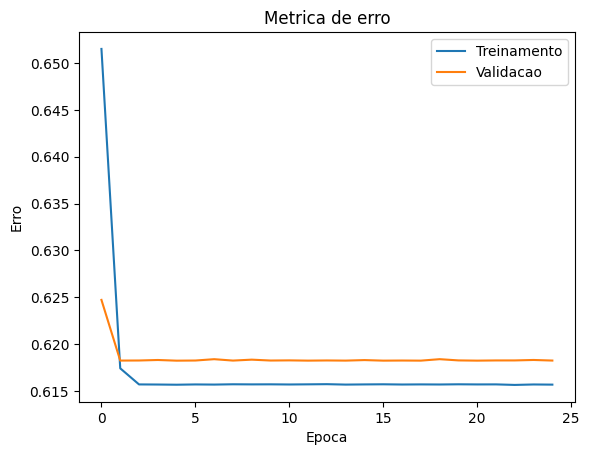

1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step

--> Acuracia (treino): 0.6943
--> Acuracia (validacao): 0.6911


In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Convert the predictions to class indices
pred_train = np.round(model.predict(X_train))
pred_val = np.round(model.predict(X_val))

# Ensure that the true labels are in the correct format (which is already integer-encoded)
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Calculate accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')